In [65]:
# Dependencies
import tweepy
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
sns.set()
import pandas as pd
import numpy as np
from datetime import datetime
import math
import json
import time

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# print(json.dumps(geo_data, indent=4, sort_keys=True))  # Json.dumps instruction example for reuse


In [67]:
# BBC, CBS, CNN, Fox, and New York times__.

# Target Search Term
#target_terms = ["#BBC", "#CBS","#CNN","#FOX","#NewYorkTimes"]
target_terms = ["BBC", "CBS","CNN","FOX","NewYorkTimes"]
counter = 0
# List to hold sentiments
sentiments = []
n = 1
needed = 2  # actually 100

for target in target_terms:
        print(target)
        counter = 0
        while len(sentiments) < (needed * n):
            tweet = api.search(target, count=1, result_type="recent")
            #print(json.dumps(tweet, indent=4, sort_keys=True))
            # Run Vader Analysis
            # print("just before results " + "counter = " + str(counter) + "\n \n")
            results = analyzer.polarity_scores(tweet["statuses"][0]["text"])
            print(tweet["statuses"][0]["text"] + "\n \n")
            print(results)
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            # convert datetime object to string and then strip out the 10 chars(date)
            Date = str(datetime.strptime(tweet["statuses"][0]["created_at"], "%a %b %d %H:%M:%S %z %Y"))
            Date = Date[:10]
            tweets_ago = counter
            # Add sentiments for each tweet into an array
            sentiments.append({"Source": target,
                           "Text": tweet["statuses"][0]["text"],
                           "Date": Date, 
                           "Compound": compound,
                           "Pos": pos,
                           "Neg": neu,
                           "Neu": neg,
                           "Tweets Ago": counter})
            #print(sentiments)
            # Add to counter 
            counter = counter + 1
            time.sleep(15)
        n += 1           
# Convert sentiments to DataFrame
sentiments_df = pd.DataFrame.from_dict(sentiments)
sentiments_df

BBC
RT @BBCWorld: Russia's Grandfather Frost faces nursery freeze https://t.co/MkWX4CnyHc
 

{'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compound': 0.0516}
RT @BBCWorld: Russia's Grandfather Frost faces nursery freeze https://t.co/MkWX4CnyHc
 

{'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compound': 0.0516}
CBS
RT @CBS: It's not about how we fall, it's about how we get up. #VSFashionShow https://t.co/NCe08O8OjU
 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
RT @CBS: It's not about how we fall, it's about how we get up. #VSFashionShow https://t.co/NCe08O8OjU
 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
CNN
RT @Rogersol99: @taxreformer @JeffFlake @SenJohnMcCain NO! Vote no on Trump big tax give away to big business and the wealthy! This is one…
 

{'neg': 0.203, 'neu': 0.709, 'pos': 0.089, 'compound': -0.4968}
RT @Rogersol99: @taxreformer @JeffFlake @SenJohnMcCain NO! Vote no on Trump big tax give away to big business and the wealthy! This is one…
 

{'neg': 0.203, 'neu': 0.

,Compound,Date,Neg,Neu,Pos,Source,Text,Tweets Ago
0,0.0516,2017-11-29,0.870,0.000,0.130,BBC,RT @BBCWorld: Russia's Grandfather Frost faces...,0
1,0.0516,2017-11-29,0.870,0.000,0.130,BBC,RT @BBCWorld: Russia's Grandfather Frost faces...,1
2,0.0000,2017-11-29,1.000,0.000,0.000,CBS,"RT @CBS: It's not about how we fall, it's abou...",0
3,0.0000,2017-11-29,1.000,0.000,0.000,CBS,"RT @CBS: It's not about how we fall, it's abou...",1
4,-0.4968,2017-11-29,0.709,0.203,0.089,CNN,RT @Rogersol99: @taxreformer @JeffFlake @SenJo...,0
5,-0.4968,2017-11-29,0.709,0.203,0.089,CNN,RT @Rogersol99: @taxreformer @JeffFlake @SenJo...,1
6,0.0000,2017-11-29,1.000,0.000,0.000,FOX,RT @lizlogan76: @jambie61 @Deemoney521 @Beverl...,0
7,0.0000,2017-11-29,1.000,0.000,0.000,FOX,RT @lizlogan76: @jambie61 @Deemoney521 @Beverl...,1
8,0.5106,2017-11-29,0.837,0.000,0.163,NewYorkTimes,"RT @JPFreire: The NewYorkTimes, a for-profit c...",0
9,0.5106,2017-11-29,0.837,0.000,0.163,NewYorkTimes,"RT @JPFreire: The NewYorkTimes, a for-profit c...",1


In [55]:
BBC_df = sentiments_df.loc[sentiments_df["Source"] == "BBC", :]  
CBS_df = sentiments_df.loc[sentiments_df["Source"] == "CBS", :]  
CNN_df = sentiments_df.loc[sentiments_df["Source"] == "CNN", :]  
FOX_df = sentiments_df.loc[sentiments_df["Source"] == "FOX", :]  
NYT_df = sentiments_df.loc[sentiments_df["Source"] == "NewYorkTimes", :]  
NYT_df

,Compound,Date,Neg,Neu,Pos,Source,Text,Tweets Ago
12,0.5106,2017-11-29,0.858,0.0,0.142,NewYorkTimes,"""But human doctors still have to make the deci...",0
13,0.5106,2017-11-29,0.858,0.0,0.142,NewYorkTimes,"""But human doctors still have to make the deci...",1
14,0.5106,2017-11-29,0.858,0.0,0.142,NewYorkTimes,"""But human doctors still have to make the deci...",2


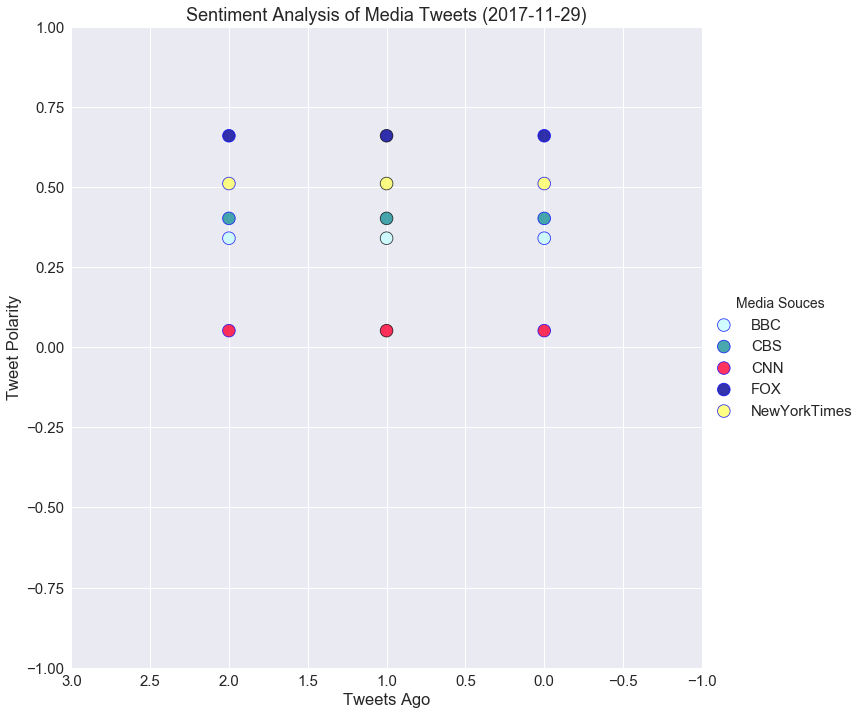

In [56]:
markersize = 160 
kws = dict(s=markersize, linewidth=.8, edgecolor="bk")
sns.set(font_scale = 1.5)

max_tweets = sentiments_df["Tweets Ago"].max()

pyber_palette = ['#c6fcff','#1b919a','#ff0033','#000099','#ffff66']  
# light Sky blue, Green, Red, blue, Yellow

sentiments_df['Media Souces'] = sentiments_df['Source']

sns.lmplot(x='Tweets Ago', y='Compound', data=sentiments_df,
            fit_reg=False, # No regression line should be displayed
            palette=pyber_palette, 
            scatter_kws=kws,
            hue= 'Media Souces',
            #hue='Source',
            size = 10,
            legend_out=True)
#plt.text(8, 45, "Note:\nCircle size correlates with driver count per city", horizontalalignment='left',size='medium', color='green', weight='light')
plt.title("Sentiment Analysis of Media Tweets ({})".format(Date))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.xlim(max_tweets+1, -1)    # margins so plot doesn't end at max values
plt.ylim(-1, 1)
plt.show()

BBC = 0.34 CBS = 0.4019 CNN = 0.0516 FOX = 0.6597 NewYorkTimes = 0.5106


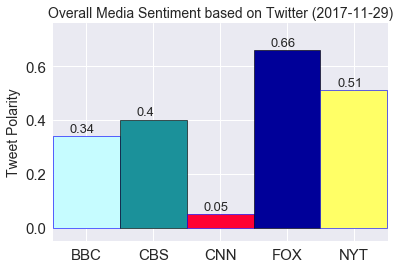

In [57]:
BBC = sentiments_df.groupby('Source')['Compound'].mean()['BBC']
CBS = sentiments_df.groupby('Source')['Compound'].mean()['CBS']
CNN = sentiments_df.groupby('Source')['Compound'].mean()['CNN']
FOX = sentiments_df.groupby('Source')['Compound'].mean()['FOX']
NewYorkTimes = sentiments_df.groupby('Source')['Compound'].mean()['NewYorkTimes']
print("BBC = " + str(BBC) + " CBS = " + str(CBS) +" CNN = " + str(CNN) +" FOX = " + str(FOX) +" NewYorkTimes = " + str(NewYorkTimes))

x_labels = ['BBC','CBS','CNN','FOX','NYT']
y_sentiments = [BBC,CBS,CNN,FOX,NewYorkTimes]
palette = ['#c6fcff','#1b919a','#ff0033','#000099','#ffff66']  
# light Sky blue, Green, Red, blue, Yellow

x_pos = [0,1,2,3,4]    # positions for media sources on x axis
plt.bar(x_pos, y_sentiments, color=sns.color_palette(palette,5), align='center', width = 1, edgecolor = 'bk', linewidth = .6)
plt.xlim(-0.5, len(x_labels)-0.49)   # 0.49 instead of 0.5 to show black edgeline of last bar
plt.ylim(min(y_sentiments)-0.1, max(y_sentiments)+0.1)  # margins of +/-0.1 beyond max/min values
plt.xticks(x_pos, x_labels)
plt.title("Overall Media Sentiment based on Twitter ({})".format(Date), fontsize=14)
plt.ylabel("Tweet Polarity", fontsize=14)
for a,b in zip(x_pos, y_sentiments):  # show values of each bar in the plot
    if b <= 0:
        B = b-0.035                   # position text below bar for negative bars.  
    else:                             # Value of 'b' is preserved as its ploted (bar height)
        B = b+0.015                   # position text above bar for positive bars
    plt.text(a-0.25, B, str(round(b, 2)), fontsize = 13)  # round to 2 decimal places before plotting
plt.show()
